# Python command to plot histogram of picodata
#### Change the interpreter to python before executing

In [51]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing


### Transfer peaks.txt to a separate folder

In [57]:
from time import sleep
import shutil
folders_ID = [] # Input data
folders_PD = [] # Peaks data
par_path = "C:\\Users\\ojo96212\\Desktop\\Ravi\\PicoData\\Na22\\"
os.chdir(par_path)
par_dir = glob.glob("Set_*")
#Transfer input_data.txt and peaks.txt from data processed folder to peaksFolder
for p in par_dir:
    os.chdir(os.path.join(par_path,p))
    f = glob.glob("PicoData_pos1_30_11_2022_16*");
    for path in f:
        fullPath_PD = os.path.join(par_path,p,path,"Data_processed","peaks_2mV.txt")
        folders_PD.append(fullPath_PD)
        fullPath_ID = os.path.join(par_path,p,path,"input_data.txt")
        folders_ID.append(fullPath_ID)
        
os.chdir(par_path)
peakDir = os.path.join(par_path,'peaksFolder');
if not os.path.exists(peakDir):
    os.mkdir(peakDir)
    os.chdir(peakDir)
else:
    print('Path exists')
    os.chdir(peakDir)
while True:
    try:
        for i in range(len(folders_PD)):
            newPath = os.path.join(peakDir,folders_PD[i].split("Data_processed\peaks_2mV.txt")[0].split("\\")[-2])
            #newPath_ID = os.path.join(peakDir,f.split(",")[0].split("\\")[-1])
            if not os.path.exists(newPath):
                os.mkdir(newPath)
            else:
                pass
            
            if not os.path.exists(os.path.join(newPath,'input_data.txt')):
                shutil.copy(folders_ID[i],os.path.join(newPath,'input_data.txt'))
            else:
                pass
            
            if not os.path.exists(os.path.join(newPath,'peaks_2mV.txt')):
                shutil.copy(folders_PD[i],os.path.join(newPath,'peaks_2mV.txt'))
            else:
                pass
        break
    except:
        fold = folders_ID[i].split("\\")[-2]
        print(f"Wait for {fold} to complete processing")
        sleep(60)
print("Done")

All files copied


Path exists
Wait for PicoData_pos1_30_11_2022_161146_30VBias_150 to complete processing


### Import Na22 data files 

In [52]:
folders = []
par_path = "C:\\Users\\ojo96212\\Desktop\\Ravi\\PicoData\\Na22\\peaksFolder"
os.chdir(par_path)
par_dir = glob.glob("PicoData_pos1_*")#29_11_2022_12*")
for p in par_dir:
    os.chdir(os.path.join(par_path,p))
    f = glob.glob("peaks_*.txt");
    for path in f:
        fullPath = os.path.join(par_path,p,path)
        folders.append(fullPath)

### Load peak values saved in peaks.txt files

In [60]:
hist_data={}
for f in folders:
    #try:
    data = np.loadtxt(f, delimiter = ',');
    with open(os.path.join(f.split("peaks_2mV.txt")[0],"input_data.txt")) as ifile:
        param_in = ifile.read()
    tI = int(param_in.split(':')[5].split(",")[0])
    capT = float(param_in.split(': ')[7].split(",")[0])
    storeVar = "Na22_"+str(tI)+"_"+str(int(capT*1000)) #Na22_timeInterval(in ns)_captureTime(ms)
    if not storeVar in hist_data:
        #print('No key')
        hist_data[storeVar] = []
    else:
        #print('Key exists')
        hist_data[storeVar] = np.append(hist_data[storeVar], data)

### Plot Na22 peaks histogram

In [54]:
bins = 150
alpha = 1
density = True

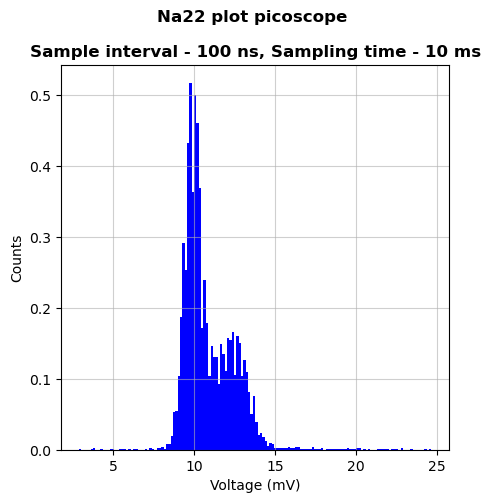

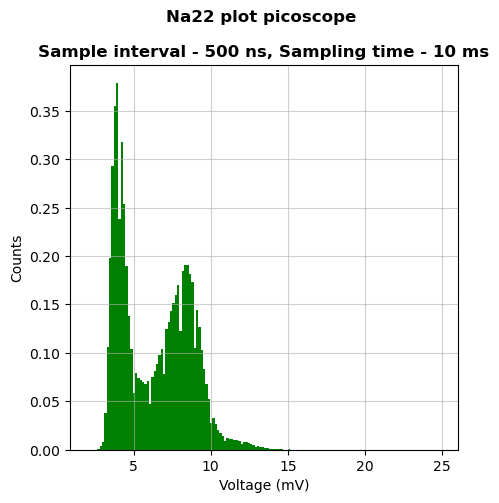

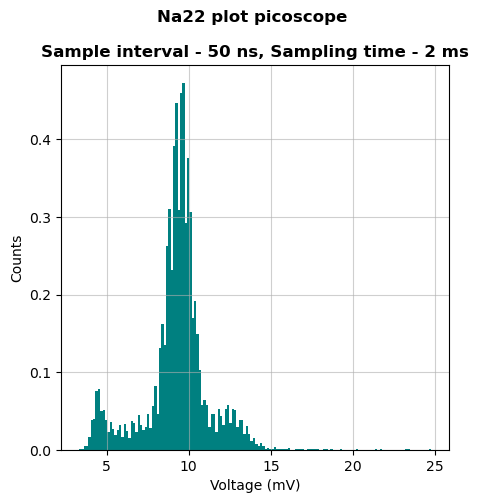

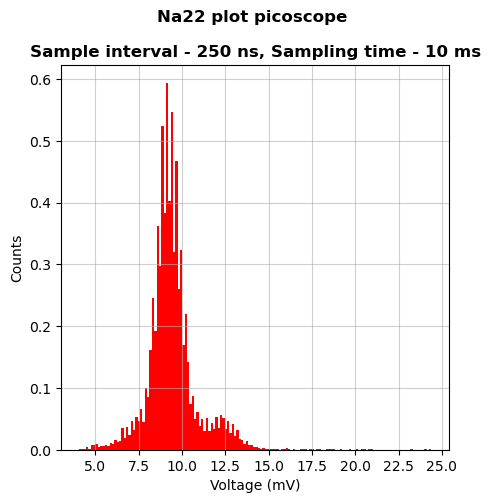

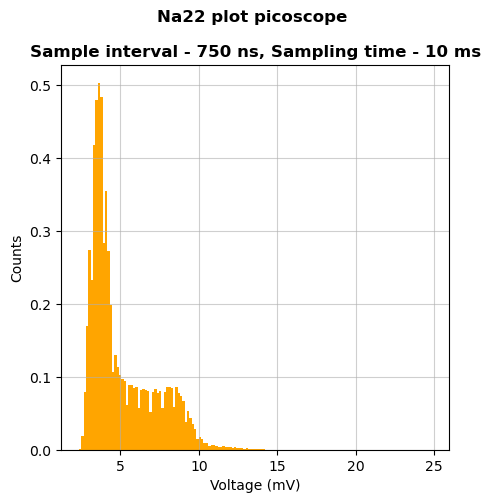

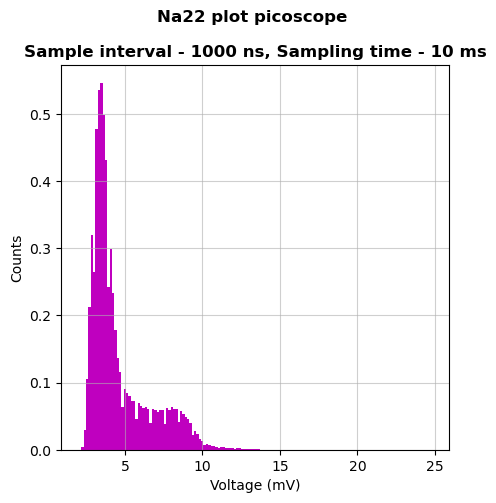

In [61]:
n = {}
bins_data = {}
patches = {}
colors = ['b', 'g', 'teal', 'r', 'orange', 'm','y']
for index, keys in enumerate(hist_data):
    plot_data = hist_data[keys]
    idx = (plot_data>2)*(plot_data<25)
    values = keys.split("_")
    fig, ax = plt.subplots(figsize=(5, 5))
    n[keys], bins_data[keys], patches[keys] = ax.hist(plot_data[idx],bins = bins, alpha = alpha, color = colors[index], density=density)
    plt.title(f"Na22 plot picoscope \n\nSample interval - {values[1]} ns, Sampling time - {values[2]} ms", weight = 'bold')
    plt.xlabel("Voltage (mV)")
    plt.ylabel('Counts')
    plt.grid(axis = 'both', alpha = 0.6)

### Scrap book

In [62]:
plot_data

array([3.42722869, 3.10678434, 3.85448766, ..., 3.58897662, 3.26853228,
       2.89315462])